# SC Green's Function

We compute here the Green's function for the superconductor where we assumed perfect translational invariance in all directions.

*[...] Calculation Details [...]*


The calculations for the real-time components is straightforward and yields the following results: 
consistently with the assumption of a conventional $s$-wave pairing, the off-diagonal (diagonal) part of the normal (anomalous) propagator vanishes
$$
    \mathcal{G}_{\uparrow\downarrow} = \mathcal{G}_{\downarrow\uparrow} = 0 \,,
    \qquad
    \mathcal{F}^\dagger_{\uparrow\uparrow} = \mathcal{F}^\dagger_{\downarrow\downarrow} = 0 \,,
$$
while the nontrivial components are given by
$$
    \mathcal{G}_{\uparrow\uparrow} = \mathcal{G}_{\downarrow\downarrow} = 
    \frac{\hbar( \hbar\omega + \varepsilon_k)}{(\hbar \omega)^2 - E_k^2} \,,
    \qquad
    \mathcal{F}^\dagger_{\downarrow\uparrow} = -\mathcal{F}^\dagger_{\uparrow\downarrow} =  
    \frac{i \hbar \Delta^\star}{(\hbar \omega)^2 - E_k^2} \,,
$$
where we defined $\varepsilon_k = \frac{\hbar^2 k^2}{2m}-\mu$, $k^2 = k_x^2 + k_y^2 + k_z^2$ and $E_k=\sqrt{\varepsilon_k^2+|\Delta|^2}$.
Therefore, within the ordinary BCS assumptions, normal and anomalous Green's functions in the bulk superconductor can be written as
$$
    \mathcal{G}_S^{(0)} =
    \frac{\hbar}{(\hbar \omega)^2 - E_k^2} 
    \begin{bmatrix}
        \hbar\omega + \varepsilon_k & 0 \\[5pt]
        0 & \hbar\omega + \varepsilon_k
    \end{bmatrix} \,,
    \qquad
    \mathcal{F}^{\dagger \, (0)}_S = 
    \frac{i \hbar}{(\hbar \omega)^2 - E_k^2}
    \begin{bmatrix}
        0 & - \Delta^\star \\[5pt]
        \Delta^\star & 0
    \end{bmatrix} \,.
$$


While the previous equations describe the bulk of a translational invariant superconductor, we are ultimately interested in the characterization of the pairing induced in the topological insulator.
For this purpose, we need to express $\mathcal{G}_S$ and $\mathcal{F}_S^\dagger$ as functions of the out-of-plane coordinate $z$ and $z'$.
Taking the Fourier anti-transform  we have
$$
	\mathcal{G}^{(0)}_S(z,z') \equiv \mathcal{G}^{(0)}_S(z-z') =
	\int \frac{d k_z}{2\pi} \, e^{-i k_z (z-z')} \mathcal{G}^{(0)}_S(k_z) \,,
$$
and
$$
	\mathcal{F}^{\dagger \, (0)}_S(z,z') \equiv \mathcal{F}^{\dagger \, (0)}_S(z-z') =
	\int \frac{d k_z}{2\pi} \, e^{-i k_z (z-z')} \mathcal{F}^{\dagger \, (0)}_S(k_z) \,,
$$
where we dropped the indices for the in-plane wavenumber $k_x$ and $k_y$.
Both integrals can be computed using contour integrals living in the complex plane.

## <font> **Poles** </font> 
In all that follows we rename $k_z \equiv k$ in order to simplify the notation. 
We can observe that both functions share the same poles, which are given by the zeros of the denominator
$(\hbar \omega)^2 - E_k^2 =  0$.
With some straightforward algebra, the 4 poles of the integrand functions can be written as
$$
    \boxed{k_p = \pm i \sqrt{\frac{1}{t} (\varepsilon_0 \pm \omega_0)}} \,,
$$
where $t=\frac{\hbar^2}{2m}$, $\varepsilon_0 = t(k_x^2+k_y^2)$ and $\omega_0 = \sqrt{(\hbar\omega)^2-|\Delta|^2}$.
It is important to note that the order  and the position of the poles in the complex plane depend on the energy $\hbar \omega$.

In [1]:
import numpy as np

# Function defining the poles 
def poles(kx, ky, omega, Delta, t = 1., hbar = 1.):
 
    e0 = t*(kx**2+ky**2)

    w0 = np.sqrt( complex((hbar*omega)**2 - np.abs(Delta)**2) )

    return np.multiply( np.sqrt([1./t*(e0+w0), 1./t*(e0+w0), 1./t*(e0-w0), 1./t*(e0-w0)]), [1j,-1j,1j,-1j])

Defining $E_0 = \sqrt{\varepsilon_0^2 + |\Delta|^2}$, the position of the poles in the complex plane can be understood as follows:

- i. **inside-gap energy** $ -|\Delta| < \hbar \omega < |\Delta|$ \
  In this regime we have that
  $$ 
  \omega_0 = \sqrt{(\hbar \omega)^2-|\Delta|^2} = i \sqrt{|\Delta|^2-(\hbar \omega)^2} \,,
  $$
  is always a purely imaginary number, and thus the poles are *complex* with nonzero real and imaginary parts.
  Evaluating the square root explicitly, the poles can be written as
  $$
      \boxed{k_p^+ = \pm (\xi_+ + i \xi_-)} \,,
      \qquad
      \boxed{k_p^- = \pm (\xi_+ - i \xi_-)} \,,
  $$
  where
  $$
      \xi_\pm = \sqrt{\frac{1}{2t} \left( \sqrt{E_0^2-(\hbar \omega)^2} \pm \varepsilon_0 \right)} \,.
  $$


- ii. **outside-gap energy** $ \hbar \omega \leq -|\Delta|$ and $ |\Delta| \geq \hbar \omega $  \
  For energy larger than the SC gap we have that $\omega_0 = \sqrt{(\hbar \omega)^2-|\Delta|^2}$ is real and positive since $(\hbar \omega)^2 \geq |\Delta|^2$.
  The poles
  $$
      \boxed{k_p^+ = \pm i \sqrt{ \frac{1}{2t}  \left( \varepsilon_0 + \omega_0 \right)}} \,,
  $$
  are always *purely imaginary* since $\varepsilon_0,\omega_0 \geq 0$.
  The other poles
  $$
      k_p^- = \pm i \sqrt{ \frac{1}{2t}  \left( \varepsilon_0 - \omega_0 \right)} \,,
  $$
  depend on the sign of $\varepsilon_0 - \omega_0$.
  We can thus distinguish two other cases:

  
  - **small energy** $ -|E_0| \leq \hbar \omega < -|\Delta|$ and $ |\Delta| < \hbar \omega \leq |E_0| $ \
    For energy larger than the SC gap but smaller in magnitude than $E_0 = \sqrt{\varepsilon_0^2+|\Delta|^2}$, we have that
    $$
        \boxed{k_p^- = \pm i \sqrt{ \frac{1}{2t}  \left( \varepsilon_0 - \omega_0 \right)}} \,,
    $$
    are purely imaginary poles, since $\varepsilon_0 > \omega_0$.
    In total we have four poles on the imaginary axis, opposite in pairs.


  - **large energy** $ \hbar \omega < -|E_0|$ and $\hbar \omega > -|E_0|$ \
    For energy larger in magnitude than $E_0 = \sqrt{\varepsilon^2+|\Delta|^2}$, we have that
    $$
        k_p^- 
        = \pm i \sqrt{ \frac{1}{2t}  \left( \varepsilon_0 - \omega_0 \right)}
        = 
        \boxed{ \pm \sqrt{ \frac{1}{2t}  \left( \omega_0 - \varepsilon_0 \right)} } \,,
    $$
    are real poles, since $\omega_0 > \varepsilon_0$.
    In total we still have four poles opposite in pairs, but now 2 are on the real axis and 2 on the imaginary one.

#### <font color='green'> **Poles** </font> 
Below, the four poles $k_p$ of the integrand function are plotted in the complex plane for a wide range of energies.

[0.+0.j 0.-0.j 0.+0.j 0.-0.j] 0.0


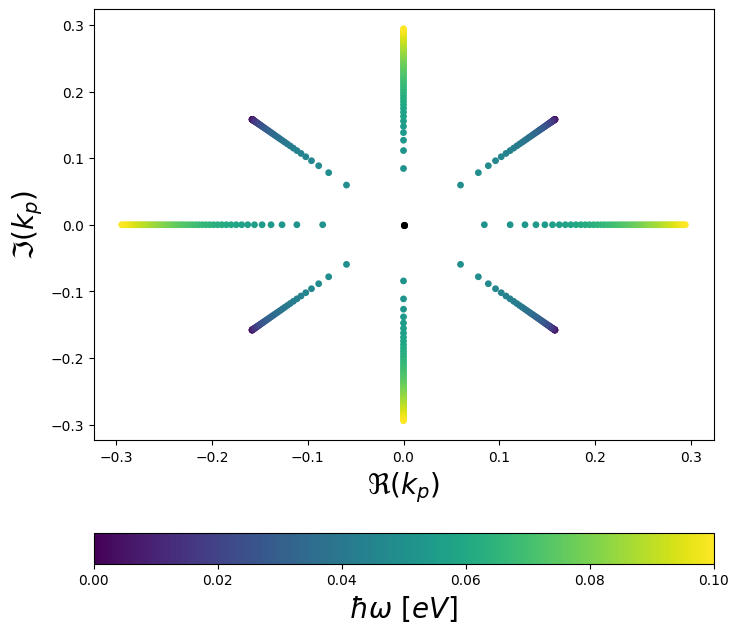

In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

# parameters
kx = 0.; ky = 0.; Delta = 0.05; e0 = kx**2+ky**2; E0 = np.sqrt(e0**2+np.abs(Delta)**2)
# energies 
Nene = 100; omega = np.linspace(0., 0.1, Nene)
# compute poles
kp = np.array([poles(kx, ky, w, Delta) for w in omega])

# figure
fig, ax = plt.subplots(1,1, figsize=(8,8))

# loop over poles
for ipole in range(4):
    # plot ploes on complex plane
    plt.scatter(kp[:,ipole].real, kp[:,ipole].imag, c=omega, cmap='viridis', s=15);

# colorbar
cbar = plt.colorbar(location='bottom')
cbar.set_label('$\hbar \omega$ $[eV]$', fontsize = 20)

# poles at Delta gap
kpDelta = poles(kx, ky, Delta, Delta)
plt.scatter(kpDelta.real, kpDelta.imag, c='black', s=15);
print(kpDelta, np.sqrt(e0))

# poles at E0 energy
#kpE0 = poles(kx, ky, E0, Delta); 
#.scatter(kpE0.real, kpE0.imag, c='red', s=15);


# labels
ax.set_xlabel('$\Re (k_p)$', fontsize = 20)
ax.set_ylabel('$\Im (k_p)$', fontsize = 20);
#ax.tick_params(axis='both', which='major', labelsize=16);